Life Cycle Process of Machine Learning:

1 Data Cleansing and Wrangling.

2 Define the metrics for which model is getting optimised.

3 Feature Engineering.

4 Data Pre-processing.

5 Feature Selection.

6 Split data into Training and Test Datasets.

7 Model Selection.

8 Model Validation.

9 Interpret the results.

We will try to predict or forecast the house prices in boston using Regression analysis on a dataset.

From point 1 to 5, it is nothing but the Explanatory data Analysis which we learned in the statistics. After the EDA, we then Split the data into training data and test data. Then we select the model of machine learning. 

For the machine learning, we use the library which is called as SCIKIT LEARN. it is called by sklearn in python.

# Starting ML- Practising Regression on Boston Dataset

# 1 Loading the inbuilt dataset onto jupyter notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression as lr # t perform the linear regression on the train and test data 
from sklearn.metrics import mean_squared_error as mse # to find out the error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split # for spliting the train and test data
from sklearn.datasets import load_boston # to load the inbuilt dataset onto the jupyter notebook.

In [3]:
boston = load_boston() # we are importing the inbuilt boston dataset from sklearn.datasets 
boston # this dataset is very popular to learn and practice machine learning.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.keys() # given below are the keys for the key-value pair in the boston dataset. We can look at the values using these key

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston['data'] # suing data key, we get all values inside the data.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston['feature_names'] #similarly using feature_names key, we get names of all the columns in the dataset.

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# 2  Now, We read the boston_house_price.csv file using the filepath and read_csv

In [7]:
filepath = r"D:\\Important Applications\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv"
# r is used as syntax for read mode.
bds = pd.read_csv(filepath)
bds # as we can see the boston_house_prices.csv is now loaded as bds
# but the columns are un-named

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [8]:
# SO INSTEAD WE USE FOLLOWIWNG SYNTAX.
bds = pd.read_csv(filepath, header = 1)
bds # now we can see we have proper indexing for both rows and columns.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The above is the complete dataset along with the input variables or attributes and the output variable or target.

So we rename the last column to target such that we know that it is the actual variable.

In [9]:
bds = bds.rename(columns = {"MEDV" : "Target"})
bds.head() #Actual variable name changed to target.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 3 Performing the EDA Statistics

Now we perform The EDA.

# 3a Data Reading

In [10]:
bds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
bds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

<AxesSubplot:>

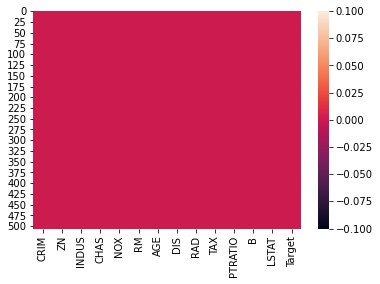

In [12]:
sns.heatmap(bds.isnull()) #as we can see in the heat map of the isnull that no null values are present in the dataset.

# 3b Using Describe

In [13]:
bds.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Following insights can be drawn from the data:

    1 Standard deviation of CRIM, ZN, INDUS, AGE, RAD, TAX, B, LSTAT is hish thatn usual, so the data is spread.
    2 Mean is greater than median in CRIM, ZN, RAD, TAX and less than median in AGE, B. So the data is skewed.
    3 Outliers are present in the datwhere there is a large difference between the maximumm value and 75 percentile.

# 3c Skewness We always check skewness after removing outliers.

Now, to check the skewness of the dataset, we use the skew function in pandas. (pandas.skew())

In [14]:
bds.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
Target     1.108098
dtype: float64

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

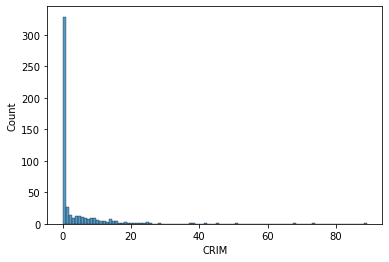

In [15]:
sns.histplot(bds['CRIM']) #very large skewness present

From the above data, we see that CRIM have a veryt high skewness of data. So, to remove the skewness from the data, we take the log of it.

For that we can either directly use the log function present in the numpy library, or we can use the boxcox function from the scipy.stats library. The syntax for boxcox is as follows:
    
    scipy.stats.boxcox(name_of_dataset_column_or_row, 0 or 0.5)
    0 argument is used to take the log and 0.5 is used to take the square root of the data.

In [16]:
bds['CRIM'] = np.log(bds['CRIM'])

In [17]:
bds.skew() # As we can see that the skewness from the data is removed.

CRIM       0.405934
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
Target     1.108098
dtype: float64

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

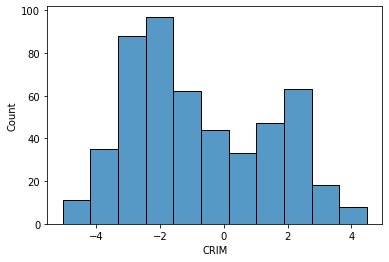

In [18]:
sns.histplot(bds["CRIM"]) #less skewed than before.

# 3d Correlation

Now, we calculate the correlation between the different input variables and the output variable.

In [19]:
bds.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.517091,0.730821,0.028496,0.788616,-0.306943,0.658284,-0.681903,0.853407,0.828234,0.389554,-0.478755,0.626615,-0.454302
ZN,-0.517091,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.730821,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.028496,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.788616,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.306943,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.658284,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.681903,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.853407,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.828234,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


As we can see, reading and understanding this data is hard so we use some visual tools for the correlation.

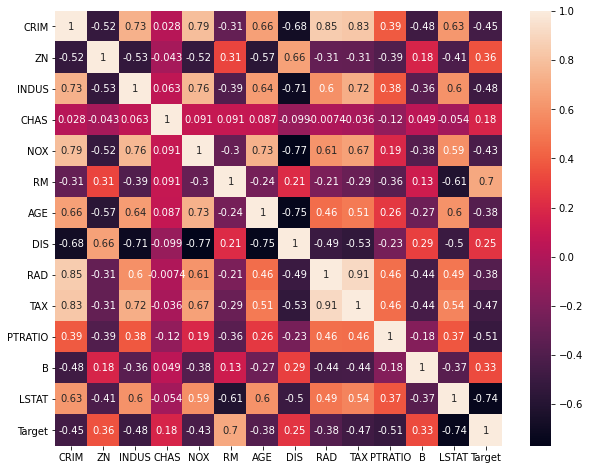

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(bds.corr(), annot = True)
plt.show()

From the Heatmap of correlation, we find that the relationship between Target and LSTAT (lower status of population) is highly negative. So, WE ALWAYS REMOVE ATTRIBUTE WITH THE HIGHLY NEGATIVE RELATIONSHIP WITH THE TARGET IN THE CLEANING OF DATA.

In [21]:
bds.drop(['LSTAT'], axis = 1, inplace = True) # inplace is used so we donnot have to reassign the dataset
bds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,Target
0,-5.064036,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,22.4
502,-3.095111,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,20.6
503,-2.800824,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,23.9
504,-2.211009,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,22.0


As we can see that the LSTAT column is deleted or dropped.

# 3e Univariate Analysis- Indivisually checking the columns.

<AxesSubplot:xlabel='CRIM'>

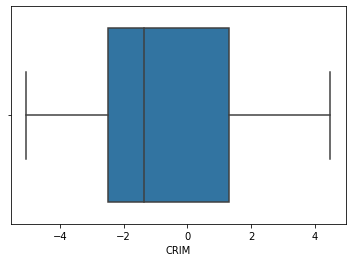

In [22]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(bds['CRIM'])

<AxesSubplot:xlabel='ZN'>

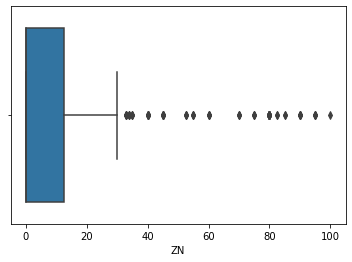

In [23]:
sns.boxplot(bds['ZN'])

In [24]:
dict = bds.columns.values

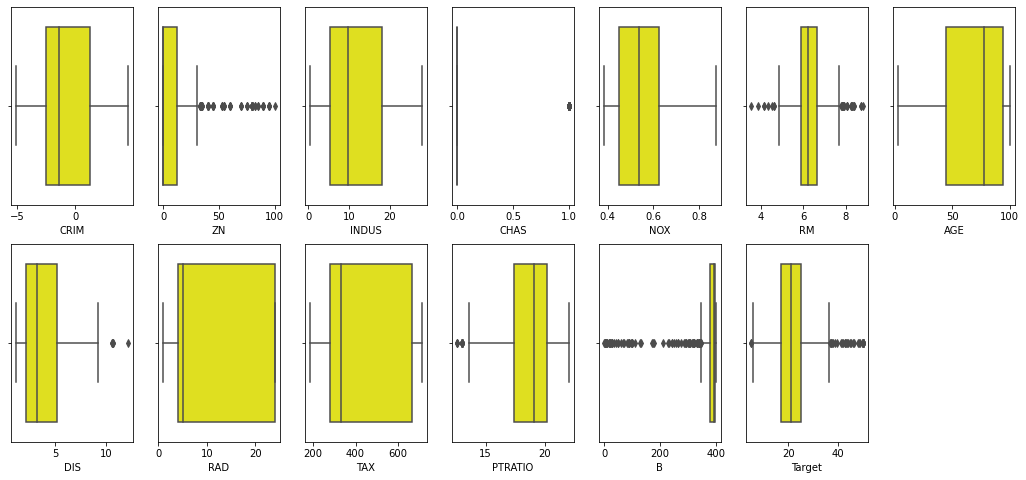

In [25]:
plt.figure(figsize = (18, 8))
for i in range(0 , len(dict)):
    plt.subplot(2,7, i + 1 )
    sns.boxplot(bds[dict[i]], color = 'yellow')

# 3f Removing outliers

In [26]:
from scipy.stats import zscore
z = zscore(bds) # finding out z score of the data
z

array([[-1.98322812,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193,  0.15968566],
       [-1.30563886, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.10152429],
       [-1.30597804, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699,  1.32424667],
       ...,
       [-0.93540227, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193,  0.14880191],
       [-0.662329  , -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.0579893 ],
       [-1.05026732, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -1.15724782]])

In [27]:
zabs = np.abs(z) # takind absolute value of zscore.
zabs

array([[1.98322812, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        0.15968566],
       [1.30563886, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.10152429],
       [1.30597804, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.32424667],
       ...,
       [0.93540227, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.14880191],
       [0.662329  , 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.0579893 ],
       [1.05026732, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        1.15724782]])

Now removing the outliers.

In [28]:
bds_new = bds[(zabs < 3).all(axis = 1)] #when working on complete dataset and not on one column, we use following syntax
bds_new # (zabs < 3).all(axis = 1) such that all outliers are removed at once, not one by one or the number of rows will be 
        # multiplied

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,Target
0,-5.064036,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,22.4
502,-3.095111,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,20.6
503,-2.800824,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,23.9
504,-2.211009,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,22.0


In [48]:
z1 = zscore(bds_new['ZN'])
l1 = np.where(z1 > 3)
l1

(array([ 39,  40,  54,  62,  63, 184, 185, 186, 187, 223, 224, 244, 248,
        249, 250, 256, 257, 258, 305], dtype=int64),)

In [30]:
bds.shape

(506, 13)

After removing the outliers, we see that only 422 rows are left out of 506.

# 4 Spliting Training Data and Test Data.

Now, after cleaning the data and removing the outliers, we now split the data into the training data and the test data.

First of all we seperate the input variables and output variable or target into two seperate dataset.

In [31]:
x = bds_new.iloc[:,0:-1] # spliting x from dataset using slicing iloc function
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90
1,-3.600502,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90
2,-3.601235,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83
3,-3.430523,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63
4,-2.672924,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99
502,-3.095111,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90
503,-2.800824,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90
504,-2.211009,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45


In [32]:
y = bds_new.iloc[:,-1] # splitting y from dataset using slicing iloc function
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 422, dtype: float64

Now after seperating the input variables and the output variables, we not split it into the training data and testing data.

For this we use the "train_test_split()" function from the sklearn library. This function gives us 4 output, which are x_train, x_test, y_train, y-test. x_train and y_train are used for training and x_test and y_test are used for the testing phase. The following syntax is used:
    
    x_train, x_test, y_train, y_test = train_test_split(input_data_name, output_data_name, test_size = a, random_state = b)

the first input argument is the "input_data_name", where we give the name of the input dataset, the second argument is the "output_data_name", where we give the name of output dataset. "test_size" is the size of the data in percentage which we want to use for the testing phase, which is given in quantile form or in decimal i.e. if we want to use 30% data in testing phase, we give 0.3 as argument in test_size. The fourth argument is "random_state", which is used when we don't want the data to be given in sequence to the one by one for the training and testing. It means if the value of random state is say 50, then then data from testing will be taken at random from all the input variables and output variables and it will not follow the sequence. If still we have doubt then we need to watch video of 27 feb.

So according to the syntax the code is given below.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50 )

random_state is very important as it is used for the tuning of the model. We change the random_state in train_test_split and again check the accuracy for the new model.This will help us to reach the higher accurac for the model. If accuracy is low we change the random_state again until the accuracy is upto mark.

After using the train_test_split function, we see that the data is now split and we can check the shape of the data.

In [34]:
x_train.shape

(316, 12)

In [35]:
y_train.shape

(316,)

# 5 Model Selection - Fitting Linear Regression Model

FIT MEATHOD FOR TRAINING

Now once the splitting is done, then we use the Linear Regression Model, where a class is already present inside the sklearn library. There is a meathod present inside the linear regression class which is called "fit". This meathod is used to fit the train and test data inside the linear regression model. the syntax for the "fit meathod is as follows:
    
    from sklearn.linear_model import LinearRegression as lr
    lm = lr() # to call the linearregression class, it is assigned to a variable.
    lm.fit(x_train, y_train)
Now, the data is fit into the linear regression model. We can now check the coefficient and the intercept of the Linear Regression Model and also we can check the score of the model that how well the model is working using the meathods given in linear regressiopn class inside the sklearn library.

In [36]:
lm = lr()
lm.fit(x_train, y_train) #model is now fitted.

LinearRegression()

In [37]:
#checking the score of the model using score function. "lm.score(x_train, y_train)" is the syntax
lm.score(x_train, y_train)

0.7492290701392412

Above is the score of the model, which means that the model is trained for 74.9 or 75% of the data. So it will be its accuracy.

In [38]:
#checking for the coefficients of input variables of LR model. "lm.coef_" is the syntax.
lm.coef_

array([-1.97295772e-01, -9.25394961e-03,  8.81046933e-03, -7.56027185e-14,
       -1.29661060e+01,  7.64381268e+00, -6.50745425e-02, -1.39341326e+00,
        1.09041556e-01, -1.16750585e-02, -9.78194739e-01,  6.72218225e-03])

Above is the value of all the coefficients of input variables which affect the target whenever their respective i/p variable is changed. i.e X1, X2, X3, X4, X5 upto X12 as there are 12 input variables present in this dataset.

In [39]:
#checking for the intercept of the lr model. "lm.intercept_" is the syntax.
lm.intercept_

10.124236508831302

Above is the intercept for the LR model.

# 6 Model Validation - Predicting and Checking Actual Values

PREDICT MEATHOD FOR TESTING

Now that we have fitted the data into Lineaar Regression Model, we can now test the model. For the testing of the model, "predict" meathod is used which is present inside the Linear Regression class in sklearn library. The syntax of the predict is as shown below:

    from sklearn.linear_model import LinearRegression as lr
    lm = lr() # to call the linearregression meathod, it is assigned to a variable.
    predicted_values = lm.predict(x_test)
This meathod will now return the predicted_values which are the values given to us by the LR Model after the testing. We can now compare these values to the actual values or y_test to check the accuracy and calculate the error.

In [40]:
pred = lm.predict(x_test)
print(f"The predicted price of houses are {pred}")
print(f"The actual price of the houses are {y_test}")

The predicted price of houses are [19.87738377 17.66962022 20.01242879 27.99405238 31.7678127  22.48761121
 21.44582537 18.28844652 31.05886377 21.51263451 23.81278155 28.02574116
 31.09656047 35.64856019 19.27155947 20.05089507 19.7200138  16.15690704
 21.80781686 33.32239401 19.11789945 24.45455576 20.28054733 19.47296034
 21.37304236 21.91293648 16.67215273 27.38808337 13.13206295 17.45783936
 21.28945612 24.86709826 27.42751977 17.99204305 12.91726683 12.11564058
 22.49302433 16.09084821 32.21642941 16.40659764  9.02037561 24.48999027
 23.64496919 21.07235233 26.71785056 12.74384518 18.6393595  15.92363129
 31.46097527 19.73675095 10.36599625 24.91297824 23.77476895 25.44511526
 16.36211241 16.38545051 19.91463771 33.0661005  19.66694946 27.27030259
 12.6176596  15.26270223 19.28519837 12.64487461 40.00644473 31.95620428
 16.36749273  8.25417694 18.03623567 17.6310756  26.99535131 26.59281203
 22.42400425 17.63076913  8.62134079 13.62608755 19.39648242 15.54884428
 22.3218248  18.5

# 7 Interpreting the results - Calculating error in the Model

Now that we have both the predicted values from the fitted Linear Regression  Model and the Actual Values from the dataset, we can compare them both and also measure the error in the LR Model.

To measure the error of the model, we have the mean_squared_error and mean_absolute_error present in the sklearn.metrics library. the following syntax is used for measuring the error:
    
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import mean_absolute_error as mae
    mae(y_test, predicted_values)
    mse(y_test, predicted_values)
First argument given is the actual values for the testing data and the second argument is the predicted values which are obtained from the fitted model.
We can also calculate the root mean squared error using the squareroot function from numpy.
    
    numpy.sqrt(mse(y_test, predicted_values))

In [41]:
print("The mean absolute error of the fitted model is", mae(y_test, pred))
print("The mean squared error of the fitted model is", mse(y_test, pred))
print("The root mean squared error of the fitted model is", np.sqrt(mse(y_test, pred)))

The mean absolute error of the fitted model is 3.061940107199201
The mean squared error of the fitted model is 28.865956484566684
The root mean squared error of the fitted model is 5.372704764321848


COEFFICIENT OF DETERMINATION

Coefficient of determination is the proportionate chage that occurs in the dependent variable whenever the independent variable changes. It gives us the extent to which the value of the dependent variable will change with varying independent variable. It is also denotated as r2 score. sklearn library has the meathod to find the r2 score. We can use the following syntax for that:

    from sklearn.metrics import r2_score
    r2_score(y_test,Predicted_values)
this will give us the r2 score in the output.

In [42]:
from sklearn.metrics import r2_score
print("The r2 score of the fitted model is", r2_score(y_test, pred))

The r2 score of the fitted model is 0.46419488469370185


So, dependent variable will change about 46% when change in independent variables occur.

# 8 Giving User Data and Predicting

Now, that we have the Linear Regression Model ready and working, we can give it the used defined data or any other data and use the model for the prediction of the house prices in the boston area. 

For doing this we first create new input independent variables and them give it to the LR Model to predicet the house prices.

In [43]:
test1 = np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90])
test1

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02])

In [44]:
test1.shape

(12,)

Now as we see that the shape of the numpy array is 12 columns. But, no rows are mentioned and the array is 1D. Which means that axis = 0 represents columns and axis = 1 represents rows in the numpy array. But, in the class Linear Regression, we have to give a 2D array. the axis = 0 is represented by rows and axis = 1 is represented by columns. That is why we change the oreintation of the numpy array using the reshape function. or else we get the following error:
    
    Expected 2D array, got 1D array instead:
    array=[].
        Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
test1 = test1.reshape(1,-1)
test1.shape

(1, 12)

As we can see that now the shape of the array is changed and we can use it in the testing of the model.

In [46]:
lm.predict(test1)

array([27.67203252])